

*   NAME: GOUTHAM R
*   SCHOOL: CDS
*   MAIL ID: goutham.r-26@scds.saiuniversity.edu.in






In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)
from sklearn.metrics import precision_score, recall_score, f1_score

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.17.1


In [ ]:
# load numpy array from npY file
from numpy import load

X_train_std = load('/content/drive/MyDrive/model 2/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/model 2/X_test_std.npy')

y_train = load('/content/drive/MyDrive/model 2/y_train.npy')
y_test = load('/content/drive/MyDrive/model 2/y_test.npy')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (1798, 224, 224, 3)
X_test_std_shape: (600, 224, 224, 3)


In [ ]:
# Load the saved best model

modelft = keras.models.load_model('/content/drive/MyDrive/model 2/m2Model.h5')

In [ ]:
modelft.summary()

In [ ]:
#calculating the total no of layers and 35 percent of it

total_layers = len(modelft.layers)
layers_to_freeze = int(0.35 * total_layers)
print(total_layers)
print(layers_to_freeze)

277
96


In [ ]:
#setting the initial 35 percent of layers as non-trainable
for layer in modelft.layers[:layers_to_freeze]:
    layer.trainable = False

# Set the remaining 65% of layers as trainable
for layer in modelft.layers[layers_to_freeze:]:
    layer.trainable = True

In [ ]:
#RECOMPILING THE MODEL
modelft.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FineTune = [
    keras.callbacks.ModelCheckpoint(
        "bestFT.weights.h5",  # Use a valid file extension for weights
        monitor='val_accuracy',
        save_weights_only=True,  # Save only the weights
        save_best_only=True  # Save only the best weights based on val_accuracy
    )
]

history_FineTune = modelft.fit(
    x=X_train_std,
    y=y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=16,
    callbacks=callbacks_FineTune
)


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 104s 436ms/step - accuracy: 0.6825 - loss: 1.0912 - val_accuracy: 0.9833 - val_loss: 0.0595
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9001 - loss: 0.3203 - val_accuracy: 0.9889 - val_loss: 0.0324
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9084 - loss: 0.2699 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9445 - loss: 0.1445 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9655 - loss: 0.1028 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9683 - loss: 0.0893 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9808 - loss: 0.0691 - val_accuracy: 0.9944 - val_loss: 0.0101
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9593 - loss: 0.1034 - val_a

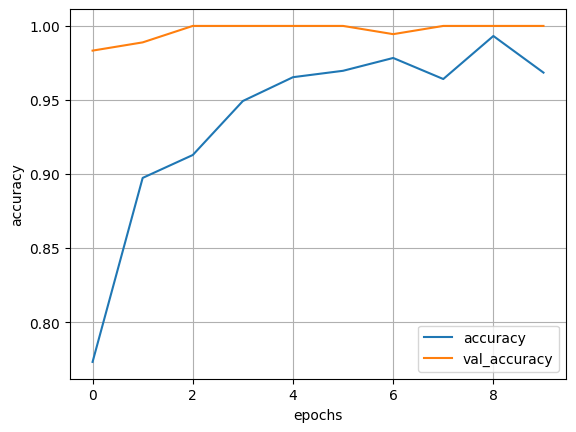

In [ ]:
#MODEL ACCURACY PLOT
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)

plt.show()

In [ ]:
#MODEL EVALUATION
testLoss_FineTune, testAccuracy_FineTune = modelft.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - accuracy: 0.9984 - loss: 0.0074
Test-loss: 0.007687, Test-accuracy: 0.998333


In [ ]:
#LOADING THE BEST WEIGHTS
modelft.load_weights("bestFT.weights.h5")

testLossft, testAccuracyft = modelft.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9966 - loss: 0.0111
Test-loss: 0.007687, Test-accuracy: 0.998333


In [ ]:
y_proba = modelft.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step
[1 2 1 2 3 3 3 1 0 1 0 1 3 4 1 2 2 3 1 4 3 4 1 4 1 2 2 3 0 2 1 1 3 1 1 4 3
 1 0 0 4 0 4 4 2 4 2 1 4 3 4 1 0 4 2 0 4 1 2 0 1 2 4 3 0 0 3 2 4 2 0 3 2 2
 4 3 1 2 4 0 1 2 3 1 0 0 2 1 4 3 0 0 0 1 3 3 0 3 4 1 2 4 0 0 4 1 3 1 4 2 1
 3 1 2 2 1 2 4 2 1 2 2 4 2 3 0 4 0 2 2 2 0 4 0 2 1 3 0 0 2 3 2 0 2 2 2 1 3
 3 0 3 1 3 3 3 0 0 2 2 3 0 1 2 0 3 3 0 3 4 1 1 2 0 3 2 4 2 4 3 2 3 4 2 3 4
 1 4 2 4 0 1 1 1 1 1 1 1 4 4 0 0 4 0 4 0 2 0 4 2 1 4 2 3 4 1 4 3 3 3 4 0 4
 4 0 4 0 0 3 1 3 2 1 3 1 2 2 4 1 1 4 3 4 3 0 2 0 4 3 2 3 0 2 1 3 3 2 1 4 3
 0 0 0 0 3 2 0 2 1 0 1 4 1 2 2 3 3 4 2 0 3 1 2 4 0 1 0 1 4 4 2 1 2 4 2 1 1
 1 1 3 2 0 0 2 2 2 0 2 3 1 0 3 3 1 0 3 0 3 3 3 0 2 1 4 2 1 0 2 1 0 3 4 2 4
 0 3 2 0 3 0 4 1 2 3 0 1 2 3 2 4 1 0 4 0 4 4 0 4 1 1 3 4 2 2 3 3 0 1 2 3 1
 2 1 1 0 3 2 2 1 3 1 4 2 0 0 1 3 1 3 3 1 1 2 0 0 2 4 2 0 3 2 2 3 4 4 1 4 3
 4 3 3 0 4 2 4 4 1 2 0 2 4 3 4 1 1 2 3 2 2 3 3 2 3 3 0 1 0 0 1 4 3 2 3 3 1
 4 1 0 4 4 0 1 2 2 0 2 3 0 1 1 1 3 3 0 4 1 4 3 2 0 0 2 0 3 

In [ ]:
#precision, recall and f1-score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9966963958300592
Recall:  0.9966666666666667
F1-score:  0.996667439216341






In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[125,   0,   0,   0,   0],
       [  1, 124,   0,   0,   0],
       [  0,   0, 124,   0,   1],
       [  0,   0,   0, 125,   0],
       [  0,   0,   0,   0, 100]])

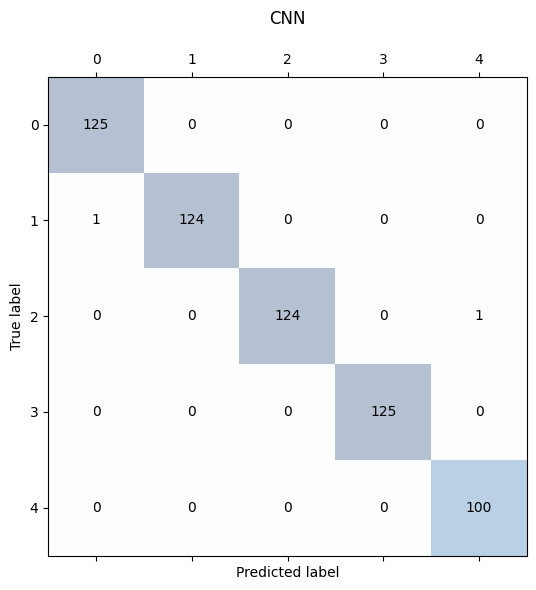

0: Damask Rose
1: Echeveria Flower
2: Mirabilis Jalapa
3: Rain Lily
4: Zinnia Elegans


In [ ]:
#Generating confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

numbers = [0, 1, 2, 3, 4]
plants = ['Damask Rose', 'Echeveria Flower', 'Mirabilis Jalapa', 'Rain Lily', 'Zinnia Elegans']

for number, plant in zip(numbers, plants):
    print(f"{number}: {plant}")


In [ ]:
cProba = modelft.predict(X_test_std[:1])

print(cProba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[[1.2492362e-02 9.8714972e-01 2.1890242e-04 1.8434275e-06 1.3707006e-04]]


In [ ]:
cLabel = np.argmax(cProba, axis=-1)

print(cLabel)

[1]


In [ ]:
print(type(modelft))


<class 'keras.src.models.functional.Functional'>
